In [1]:
# Importing libarieres
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
from google.colab import files
uploaded = files.upload()

Saving fraud.csv to fraud (1).csv
Saving insurance_claim.csv to insurance_claim (1).csv


In [3]:
# Read the data
df = pd.read_csv('fraud.csv')
df1 = pd.read_csv('insurance_claim.csv')
display(df.head())
display(df.shape)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


(1000, 39)

In [4]:
# Read the inusrance claims 
display(df1.head())
display(df1.shape)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


(9134, 26)

In [5]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# Summary Statistics
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
# Check for missing data 
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
miss_df = pd.DataFrame({'Train Missing Ratio' :df_na})
miss_df.head()

,Train Missing Ratio


In [8]:
# Unique values in each variables
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
# Replacing with '?' wih Nan
df = df.replace('?',np.NaN)
df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [10]:
# Replace the '?' with mode of collision_type feature.
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

# Replace missing information as 'No' for property_damage. Feature can have only 2 possibles values. Either Yes or No. 
# If information is nor available we will assume it was not reported.
df['property_damage'].fillna('No', inplace = True)

# The assumption above to replace missing information as 'No' for police_report_available
df['police_report_available'].fillna('No', inplace = True)

df.isnull().any().any()

False

In [11]:
# Converting fraud reported in 1 and 0 form 
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(1,0))

,fraud_reported
insured_sex,
FEMALE,537
MALE,463


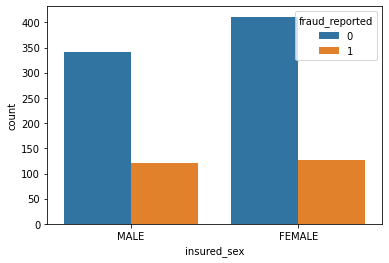

In [12]:
# Count the fraudulent transactions by gender
ax = sns.countplot(x="insured_sex", hue="fraud_reported", data=df)

# Analyze fraudulent transactions by gender
df[["insured_sex", "fraud_reported"]].groupby(['insured_sex']).count().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
insured_sex,
MALE,0.261339
FEMALE,0.234637


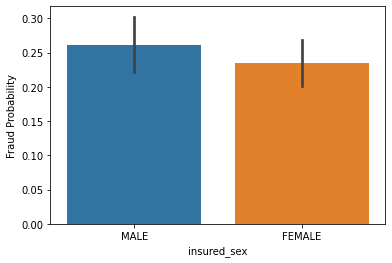

In [13]:
# Analyze the Probability of fraud by Gender
g = sns.barplot(x="insured_sex",y="fraud_reported",data=df)
g = g.set_ylabel("Fraud Probability")
df[["insured_sex", "fraud_reported"]].groupby(['insured_sex']).mean().sort_values(by='fraud_reported', ascending=False)

Text(0, 0.5, 'Frequency')

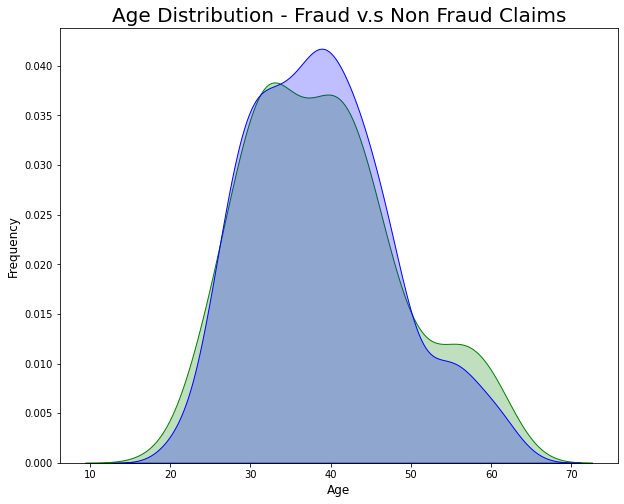

In [14]:
# Let's explore the distribution of age by response variable (Fraud Reported)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(df.loc[(df['fraud_reported'] == 1),'age'] , color='g',shade=True, label='Fraudulent Claims')
axis = sns.kdeplot(df.loc[(df['fraud_reported'] == 0),'age'] , color='b',shade=True,label='Nonfraudulent Claims')
plt.title('Age Distribution - Fraud v.s Non Fraud Claims', fontsize = 20)
plt.xlabel("Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

,fraud_reported
insured_education_level,
JD,161
High School,160
Associate,145
MD,144
Masters,143
PhD,125
College,122


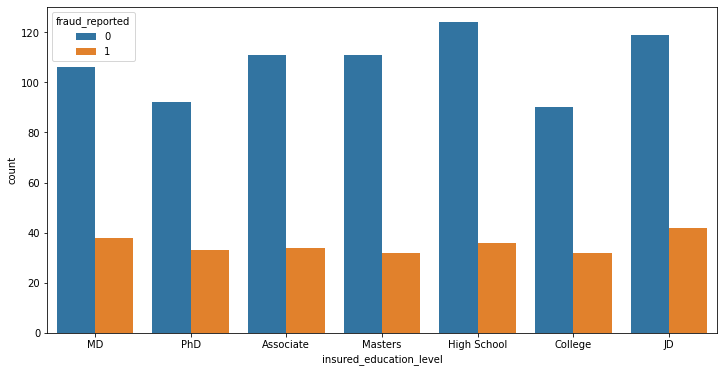

In [15]:
# Count the fraudulent transactions by insured_education_level
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x="insured_education_level", hue="fraud_reported", data=df)

# Analyze the fraudulent transactions by insured_education_level
df[["insured_education_level", "fraud_reported"]].groupby(['insured_education_level']).count().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
insured_relationship,
own-child,183
other-relative,177
not-in-family,174
husband,170
wife,155
unmarried,141


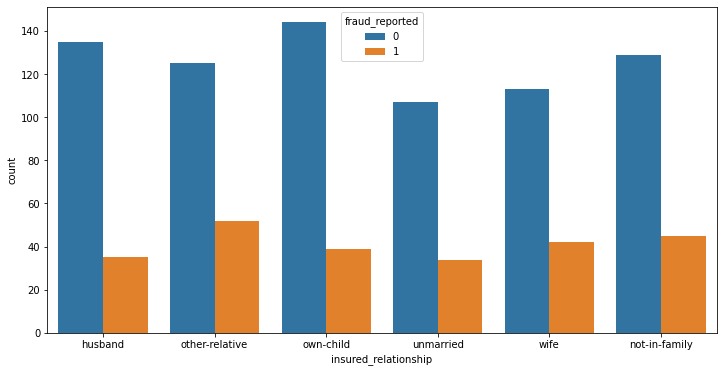

In [16]:
# Count the fraud transactions by insured relationship
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x="insured_relationship", hue="fraud_reported", data=df)

# Analyze the fraudu transactions by insured_relationship
df[["insured_relationship", "fraud_reported"]].groupby(['insured_relationship']).count().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
incident_type,
Single Vehicle Collision,0.290323
Multi-vehicle Collision,0.272076
Parked Car,0.095238
Vehicle Theft,0.085106


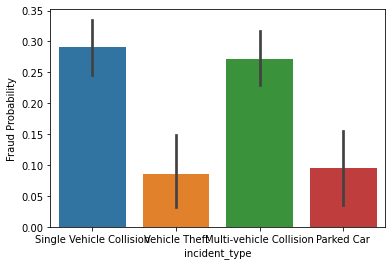

In [17]:
# Analyze the Probability of fraud by incident_type

g = sns.barplot(x="incident_type",y="fraud_reported",data=df)
g = g.set_ylabel("Fraud Probability")
df[["incident_type", "fraud_reported"]].groupby(['incident_type']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
incident_state,
OH,0.434783
NC,0.309091
SC,0.294355
PA,0.266667
VA,0.227273
NY,0.221374
WV,0.179724


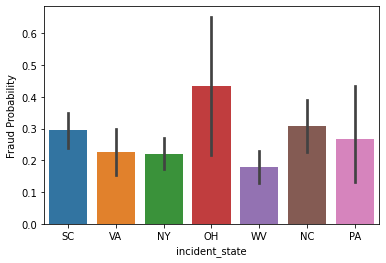

In [18]:
# Analyze the Probability of fraud by incident_state

g = sns.barplot(x="incident_state",y="fraud_reported",data=df)
g = g.set_ylabel("Fraud Probability")
df[["incident_state", "fraud_reported"]].groupby(['incident_state']).mean().sort_values(by='fraud_reported', ascending=False)

In [19]:
# Data Processing

In [20]:
# Import libraries for data processing & modeling

from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE

In [21]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24] 
catg = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period'] = pd.cut(df.incident_hour_of_the_day, bins, labels=catg).astype(object)
df[['incident_hour_of_the_day', 'incident_period']].head()

,incident_hour_of_the_day,incident_period
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening


In [22]:
#Transforming some numerical variables that are really categorical
df['number_of_vehicles_involved'] = df['number_of_vehicles_involved'].apply(str)
df['witnesses'] = df['witnesses'].apply(str)
df['bodily_injuries'] = df['bodily_injuries'].apply(str)

In [23]:
dummies = pd.get_dummies(df[['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 
                                'insured_hobbies', 'insured_relationship', 'incident_type',
                                'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state',
                                'incident_city', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
                                'witnesses', 'police_report_available', 'auto_make', 'auto_model', 'incident_period']])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,...,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,incident_period_afternoon,incident_period_early_morning,incident_period_evening,incident_period_fore-noon,incident_period_morning,incident_period_night,incident_period_past_midnight
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [24]:
#let's drop unnecessary variables

df = df.drop(columns = ['policy_number', 'policy_csl','insured_zip','policy_bind_date', 'incident_date', 
                              'incident_location', 'auto_year', 'incident_hour_of_the_day', 'policy_state', 
                              'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies',
                              'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
                              'authorities_contacted', 'incident_state', 'incident_city', 'number_of_vehicles_involved',
                              'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available',
                              'auto_make', 'auto_model', 'incident_period'])

In [25]:
# Seperating the predictor and target variable 

In [26]:
x = pd.concat([dummies, df], axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 171 entries, policy_state_IL to fraud_reported
dtypes: float64(1), int64(11), uint8(159)
memory usage: 249.1 KB


In [27]:
# predictor 
x_unscaled = x.iloc[:, 0:-1]  
# target 
y = x.iloc[:, -1]  

In [28]:

# let's split the dataset into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x_unscaled, y, test_size = 0.2, random_state = 42)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 170)
Shape of x_test : (200, 170)
Shape of y_train : (800,)
Shape of y_test : (200,)


In [29]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Columns: 170 entries, policy_state_IL to vehicle_claim
dtypes: float64(1), int64(10), uint8(159)
memory usage: 199.2 KB


In [30]:
# standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
Y_train= y_train

# Models

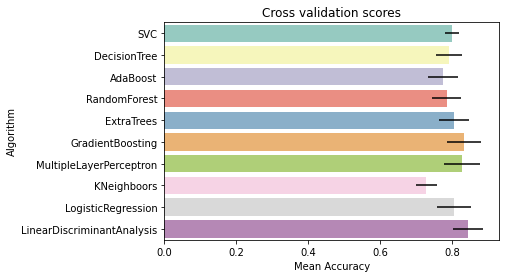

In [31]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
# Modeling differents algorithms. Thanks Yassine for this great piece of code. 

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, Y_train , scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

ADABOOST CLASSIFIER

In [32]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)
ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 1113 out of 1120 | elapsed:   17.6s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   17.6s finished


0.8025

EXTRA TREES CLASSIFIER

In [33]:
ExtC = ExtraTreesClassifier()
## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators" :[100,300],
                 "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   43.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.3min finished


0.80375

RANDOMFOREST CLASSIFIER

In [34]:
RFC = RandomForestClassifier()
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators" :[100,300],
                 "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.5min finished


0.7949999999999999

Gradient Boosting 

In [35]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]}

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  2.6min finished


0.81875

SVC classifier

In [36]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(X_train,Y_train)
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  2.1min finished


0.84375

Training Accuracy:  0.94375
Testing Accuarcy:  0.78
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       145
           1       0.63      0.47      0.54        55

    accuracy                           0.78       200
   macro avg       0.73      0.68      0.70       200
weighted avg       0.77      0.78      0.77       200



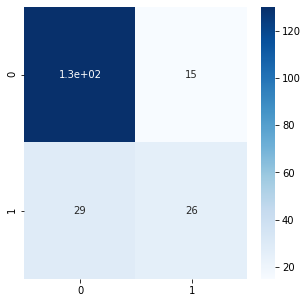

In [37]:
y_pred_rf = gsSVMC.predict(x_test)
print("Training Accuracy: ", gsSVMC.score(X_train, Y_train))
print('Testing Accuarcy: ', gsSVMC.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.show()

SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_sample(x_unscaled, y.values.ravel())
print("Shape of x_resample :",x_resample.shape)
print("Shape of y_resample :",y_resample.shape)

Shape of x_resample : (1506, 170)
Shape of y_resample : (1506,)


In [39]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)
print("Shape of x_train2 :", x_train2.shape)
print("Shape of y_train2 :", y_train2.shape)
print("Shape of x_test2 :", x_test2.shape)
print("Shape of y_test2 :", y_test2.shape)

Shape of x_train2 : (1204, 170)
Shape of y_train2 : (1204,)
Shape of x_test2 : (302, 170)
Shape of y_test2 : (302,)


In [40]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  4.3min finished


Training Accuracy:  1.0
Testing Accuarcy:  0.9238410596026491
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       154
           1       0.95      0.89      0.92       148

    accuracy                           0.92       302
   macro avg       0.93      0.92      0.92       302
weighted avg       0.93      0.92      0.92       302



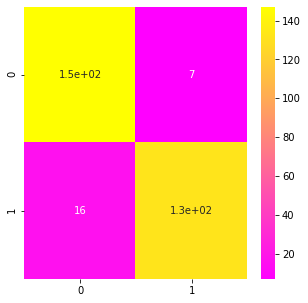

In [41]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsSVMC.fit(x_train2,y_train2)

y_pred_rf = gsSVMC.predict(x_test2)
print("Training Accuracy: ", gsSVMC.score(x_train2, y_train2))
print('Testing Accuarcy: ', gsSVMC.score(x_test2, y_test2))

# making a classification report
cr = classification_report(y_test2,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test2, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

From above we can say that oversampling using SMOTE helped in improving the predictions all the way to almost 92% in test dataset.

In [42]:
# Save the model for future use 
import joblib
joblib.dump(gsSVMC,'automobile_insurance.pkl')

['automobile_insurance.pkl']